In [1]:
import pandas as pd
import os

In [2]:
current_directory = os.getcwd()
print("Current directory : ", current_directory)

path_base =  "/home/aymeric/python-scripts/anses_medialab/datas/" #aymeric

index_file="index_alldefault_nameexhaustive_aymeric.csv.tar.gz"
term_specific ="list_100_term_chi2.csv"



print("Path base : ", path_base)
print("index file : ", index_file)

Current directory :  /home/aymeric/audition
Path base :  /home/aymeric/python-scripts/anses_medialab/datas/
index file :  index_alldefault_nameexhaustive_aymeric.csv.tar.gz


In [3]:
# Using '*' pattern 
#print('\nNamed with wildcard *:')
i=-1
dic_id={}
for x in [x for x in pd.read_csv(f'{path_base}the_true_all_annotated_account.csv').columns if 'id' in x]:
    dic_id[x]=str
dic_id
users1 = pd.read_csv(f'{path_base}the_true_all_annotated_account.csv', sep =",", dtype=dic_id)

In [4]:
df=pd.read_csv(f'{path_base}{index_file}', sep='\t', dtype={"doc_id" :"string", "sent_id": "string"})
df0 = df.drop_duplicates()
df0["doc_sent_id"] = df0["doc_id"]+"_"+df0["sent_id"]

/tmp/ipykernel_7261/69064801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0["doc_sent_id"] = df0["doc_id"]+"_"+df0["sent_id"]


In [5]:
df0 = pd.read_csv(f"{path_base}the_true_tweets_and_posts_with_annotated_account.csv", sep =",",dtype={"id":str, "user_id":str})

/tmp/ipykernel_7261/2135346570.py:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv(f"{path_base}the_true_tweets_and_posts_with_annotated_account.csv", sep =",",dtype={"id":str, "user_id":str})


In [6]:
df1 = df0[["id","text","date","user_id","user_screen_name"]].loc[df0.platform=="twitter"].merge(users1[['user_id', 'user_screen_name', 'Type_entite',
       'Genre', 'User_role', 'user_description', 
       'Synthetic_logics', 'Synthetic_logics_fr']], on=["user_id","user_screen_name"], how = "left")
df1 = df1.loc[~df1.Type_entite.isna()].drop_duplicates()


In [7]:
df1.columns

Index(['id', 'text', 'date', 'user_id', 'user_screen_name', 'Type_entite',
       'Genre', 'User_role', 'user_description', 'Synthetic_logics',
       'Synthetic_logics_fr'],
      dtype='object')

In [ ]:
df1[['id', 'text', 'date', 'user_id', 'user_screen_name']]

## Pre-process Text and select sample

In [91]:
import re #librairie pour les regex
import emoji
import nltk

In [92]:
alpha = re.compile(r'[^a-zA-Z ]+')

df1["clean_text"] = df1.apply(lambda row: re.sub(r"http\S+", "", str(row.text)).lower(), 1)
df1["clean_text"] = df1.apply(lambda row: re.sub(r"_p_", "", str(row.clean_text)).lower(), 1)
df1["clean_text"] = df1.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.clean_text.split())), 1)
df1["clean_text"] = df1.apply(lambda row: " ".join(re.sub("[^a-zA-Zàâäéèêëïîôöùûüÿçß]+", " ", row.clean_text).split()), 1)
df1["tokens"] = df1.apply(lambda row: nltk.tokenize.wordpunct_tokenize(row.clean_text),1)
df1

id  \
1        1212156152076787712   
4        1212143182022107136   
9        1212139351733350401   
15       1212115180936716289   
18       1212110761968963585   
...                      ...   
1535735  1212283099511427073   
1535744  1212270999942643712   
1535745  1212268361285021697   
1535746  1212267678129434624   
1535750  1212240493523943424   

                                                      text        date  \
1        @coquelicots_ Déjà faudrait il commencer par n...  2019-12-31   
4        Pesticides: les Coquelicots collent les SDHI! ...  2019-12-31   
9        @PICO2935 Donc le spinosad est une "substance ...  2019-12-31   
15       @coquelicots_ @genefutures @APEnvironnement @L...  2019-12-31   
18       Les oiseaux disparaissent : la destruction des...  2019-12-31   
...                                                    ...         ...   
1535735  #RT @ID_LinfoDurable: Les néonicotinoïdes agis...  2020-01-01   
1535744  Les néonicotinoïdes agissent, même à faible do...  2020-01-01   
1535745  @MaireAntiPest @ville_chaville Le glyphosate e...  2020-01-01   
1535746  @SmoothHeadGuy @RobinDu03590523 @AlerteEnviron...  2020-01-01   
1535750  "Comment sait-on qu’ils disparaissent ? Pourqu...  2020-01-01   

                     user_id user_screen_name   Type_entite  Genre  \
1         776804948705153025       fermedupre      Personne  Homme   
4                 2312970457         PHurlaux      Personne  Homme   
9                  882404732           YveCtx      Personne    NaN   
15        954848807979769856        PaulYment      Personne  Homme   
18                 769414741  FestimagesNatur      Personne  Homme   
...                      ...              ...           ...    ...   
1535735  1037704670590971911      AromaSencha  Organisation    NaN   
1535744   863346552819122176  ID_LinfoDurable  Organisation    NaN   
1535745            810875040     DuahcimNiala      Personne    NaN   
1535746            810875040     DuahcimNiala      Personne    NaN   
1535750           2415790106         plnFaAOD  Organisation    NaN   

                                       User_role  \
1                          Exploitation agricole   
4                                   Commentateur   
9                          Exploitation agricole   
15                                  Commentateur   
18           Auteur.trices et réalisateur.trices   
...                                          ...   
1535735  Activités industrielles ou commerciales   
1535744                                    Média   
1535745                             Commentateur   
1535746                             Commentateur   
1535750                       mouvements sociaux   

                                          user_description  \
1        🚜🚜🚜 #Agriculteur #FrAgTw pratique l'Agricultur...   
4                                                      NaN   
9        #lesAgriculteursVousOffrentDesFleurs\n#agronom...   
15       Liberté de pensée. Humaniste imparfait. Voyage...   
18       Concepteur, organisateur Festimages Nature : 1...   
...                                                    ...   
1535735  🎁Clique sur le lien pour recevoir ton cadeau G...   
1535744  Le 1er média pour s’informer et agir ! #TousAc...   
1535745  On doit résister aux barbaries qu'elles s'appe...   
1535746  On doit résister aux barbaries qu'elles s'appe...   
1535750  Agent Orange/Dioxine, armes chimiques, pestici...   

                    Synthetic_logics             Synthetic_logics_fr  \
1        Agroindustrial_perspectives  Perspectives agroindustrielles   
4            Ecological_perspectives        Perspectives écologistes   
9        Agroindustrial_perspectives  Perspectives agroindustrielles   
15                  Comment_the_news      Commentaire de l’actualité   
18           Ecological_perspectives        Perspectives écologistes   
...                              ...                             ...   
1535735              Marketing_logic 

In [96]:
#

df1["len_txt"] = df1.tokens.str.len()
df = df1.loc[df1.len_txt > 5]
d_sample = df.sample(frac=0.10, replace=True, random_state=42)
len(d_sample)

20310

In [119]:
texts_id = d_sample.id.to_list()
#texts_indice = df0.index.to_list()
texts = d_sample.clean_text.to_list()
#timestamp = df0.local_time.to_list()


## Topic modelling

### Rapide aperçu de BERTopic

In [27]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
final_stopwords_list = stopwords.words('french')
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=final_stopwords_list)

In [ ]:
model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='french', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(texts)

In [ ]:
freq = model.get_topic_info()
freq

## Décomposition de BERTopic

BERTopic est composé de quatre "étapes" :

1. Le plongement lexical des termes du corpus à l'aide d'un modèle de langue (par convention, on utilise le plus souvent un modèle sentence-tranformer)
2. La réduction de la dimensionalité de l'espace vectoriel obtenu à la fin de la première étape
3. L'extraction de clusters
4. La labellisation des clusters en utilisant c-TF-IDF

Par défaut, la fonction `.BERTopic()` utilise le modèle `all-MiniLM-L6-v2` (si language="english") ou `paraphrase-multilingual-MiniLM-L12-v2` (si language="multilingual"). La méthode utilisée pour réduire la dimensionalité est "UMAP" et la clusterisation se fait avec "HDBSCAN".



### Embeddings

In [138]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
model
model.get_sentence_embedding_dimension()

384

In [139]:
import numpy as np
from tqdm.auto import tqdm


n= len(texts)

batch_size = 20

embeds = np.zeros((n, model.get_sentence_embedding_dimension()))
print(embeds)
for i in tqdm(range(0, n, batch_size)):
    i_end = min(i+batch_size, n)
    batch = texts[i:i_end]
    batch_embed = model.encode(batch)
    embeds[i:i_end,:] = batch_embed


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


100%|███████████████████████████████████████| 1016/1016 [04:22<00:00,  3.87it/s]


100%|█████████████████████████████████████████████| 8/8 [00:52<00:00,  6.52s/it]


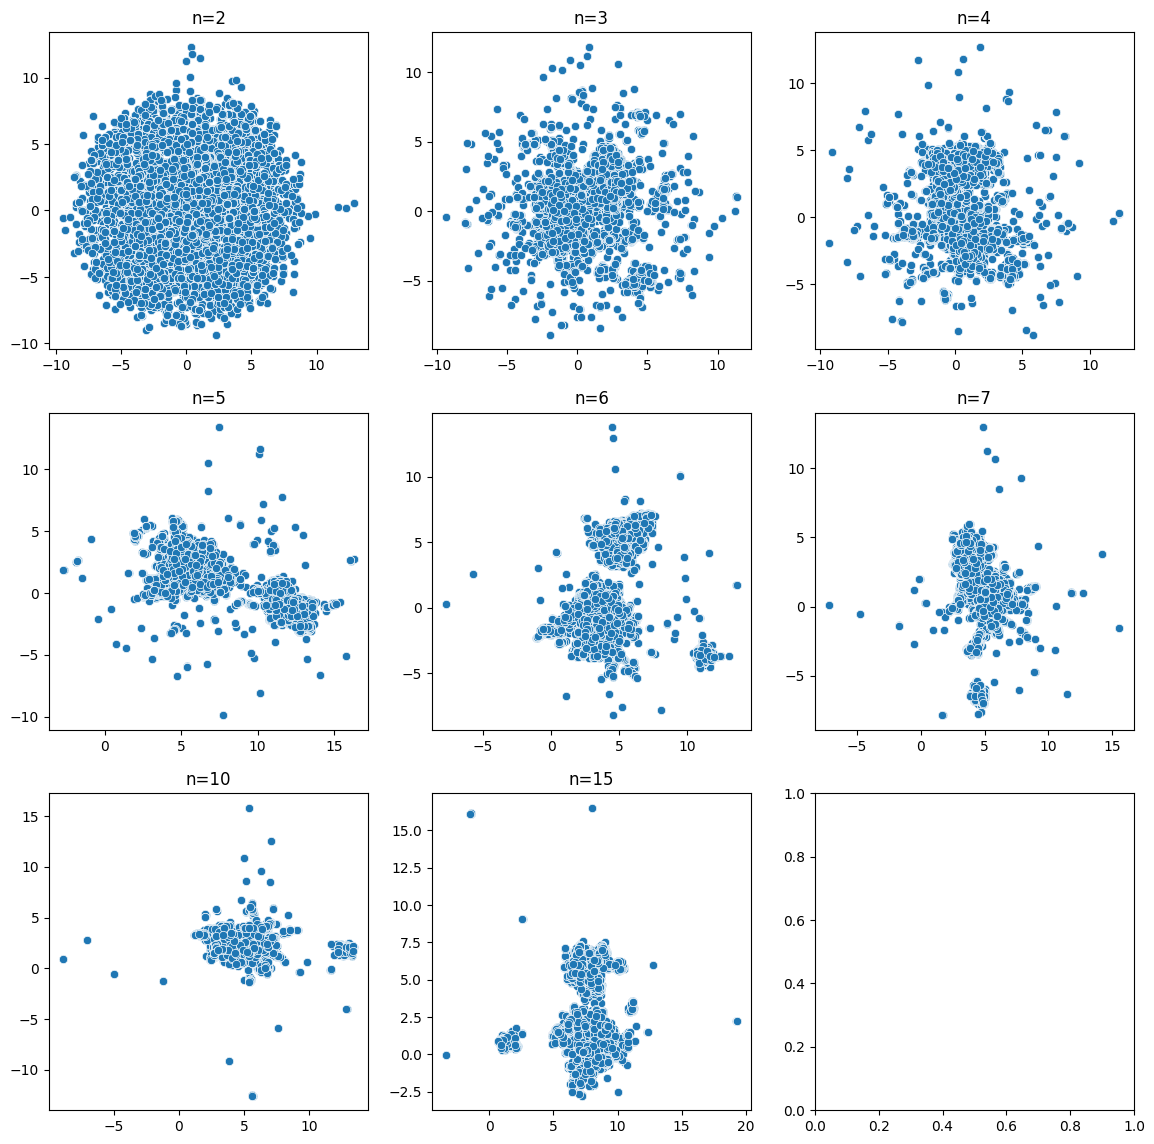

In [140]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 3, figsize=(14, 14))
nns = [2, 3, 4, 5, 6, 7, 10, 15]
i, j = 0, 0
for n_neighbors in tqdm(nns):
    fit = umap.UMAP(n_neighbors=n_neighbors, random_state=42, n_components=3, min_dist=0.05)
    u = fit.fit_transform(embeds)
    sns.scatterplot(x=u[:,0], y=u[:,1],  ax=ax[j, i])
    ax[j, i].set_title(f'n={n_neighbors}')
    if i < 2: i += 1
    else: i = 0; j += 1

In [144]:
import plotly.express as px

palette = ['#1c17ff', '#faff00', '#8cf1ff', '#738FAB', '#030080', '#738fab']

fit = umap.UMAP(n_neighbors=5, n_components=3, min_dist=0.05, random_state=42)
u = fit.fit_transform(embeds)

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    #color=data['sub'][:n],
    #custom_data=[data['sub'][:n], data['title'][:n]],
    #color_discrete_sequence=palette
)
fig.update_traces(
    
)


In [ ]:
fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    custom_data=[data['sub'][:n], data['title'][:n]],
    color_discrete_sequence=[palette[0]]
)
fig.update_traces(
    hovertemplate="<br>".join([
        "sub: %{customdata[1]}",
        "title: %{customdata[0]}"
    ])
)

### Clustering avec HDBSCAN

In [145]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)

HDBSCAN()

<Axes: ylabel='$\\lambda$ value'>

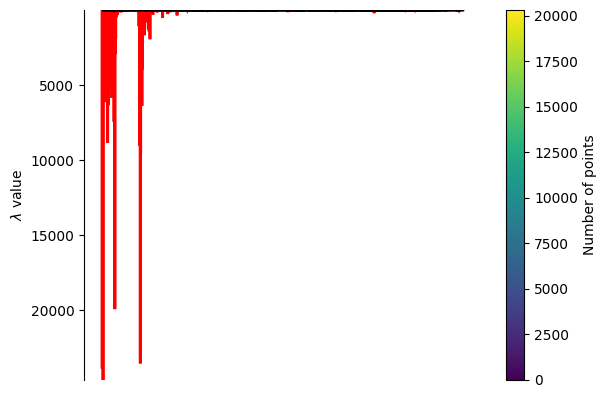

In [146]:
clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='$\\lambda$ value'>

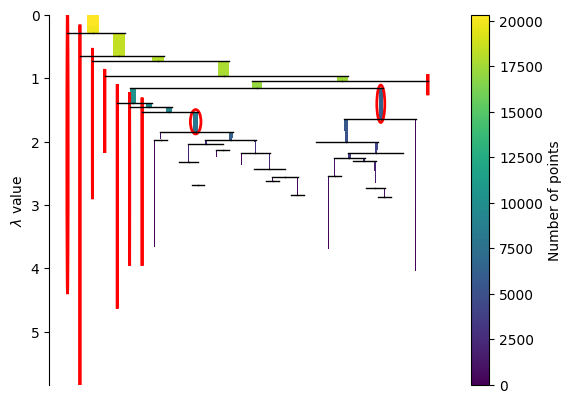

In [147]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=100)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)


<Axes: ylabel='$\\lambda$ value'>

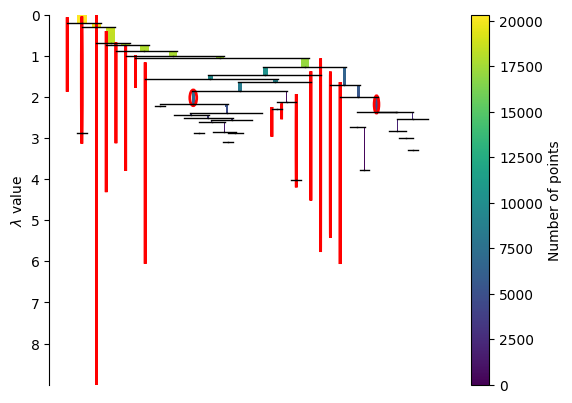

In [148]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

20310


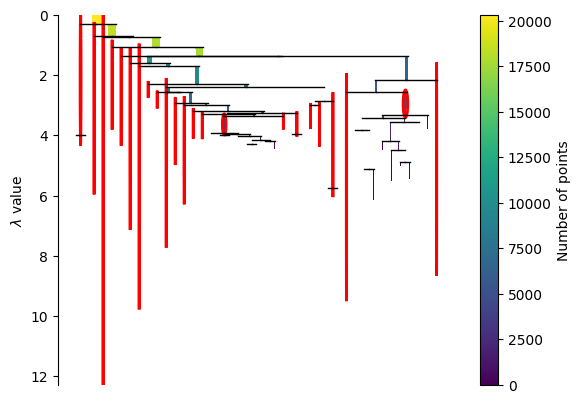

In [153]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=100, min_samples=30)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)
print(len(clusterer.labels_))

In [60]:
colors = [str(x) for x in clusterer.labels_]

fig = px.scatter_3d(
    x=u[:,0], y=u[:,1], z=u[:,2],
    color=colors,
    #custom_data=[data['sub'][:n], data['title'][:n]],
    #color_discrete_sequence=palette
)
fig.update_traces(
    hovertemplate="<br>".join([
        "sub: %{customdata[1]}",
        "title: %{customdata[0]}"
    ])
)

### Labellisation avec c-TF-IDF

In [154]:
classes = {}
for label in set(clusterer.labels_):
    classes[label] = {
        'vocab': set(),
        'tokens': [],
        'tfidf_array': None
    }
classes

{0: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 1: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 2: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 3: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 4: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 5: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 6: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 7: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 8: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 9: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 10: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 11: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 12: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 13: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 14: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 15: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 16: {'vocab': set(), 'tokens': [], 'tfidf_array': None},
 17: {'vocab': set(), 't

In [155]:
list_cluster = [x for x in clusterer.labels_]
len(list_cluster)

20310

In [156]:
data = pd.DataFrame(data= {"id":texts_id, "texts":texts, "cluster":list_cluster})
data

id                                              texts  \
0      1394727183952879620  et bizarrement aucun autres syndicats agricole...   
1       449067648014647296  jardineries d alsace apportent leurs conseils ...   
2       745161938674450432  glyphosate une bataille entre experts lobbies ...   
3      1029991639144689664  sauf que le syndrome d effondrement a des caus...   
4      1406488192061214721  pas de résidus de mais au sol donc c était une...   
...                    ...                                                ...   
20305   691742085838319616  l actu d arvalis érosion de l efficacité des h...   
20306   586234451459497984  etats unis premières mesures contre les pestic...   
20307  1019106689948086273  en guadeloupe les ouvriers de la banane malade...   
20308  1326593202137272321  si la seule nouveauté en biocontrole est le so...   
20309  1221846979023601665  premier recours judiciaire du collectif des ma...   

       cluster  
0           21  
1           -1  
2            9  
3           -1  
4           -1  
...        ...  
20305       21  
20306        0  
20307       -1  
20308       17  
20309       19  

[20310 rows x 3 columns]

In [157]:


# first lowercase and remove punctuation
alpha = re.compile(r'[^a-zA-Z ]+')
#data["tokens"] = data.apply(lambda row: re.sub(r"http\S+", "", str(row.texts)).lower(), 1)
#data["tokens"] = data.apply(lambda row: alpha.sub('', row.texts).lower(), 1)
data["tokens"] = data.apply(lambda row: re.sub(r"http\S+", "", str(row.texts)).lower(), 1)
data["tokens"] = data.apply(lambda row: re.sub(r"_p_", "", str(row.tokens)).lower(), 1)
data["tokens"] = data.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", row.tokens.split())), 1)
data["tokens"] = data.apply(lambda row: " ".join(re.sub("[^a-zA-Zàâäéèêëïîôöùûüÿçß]+", " ", row.tokens).split()), 1)
data["tokens"] = data.apply(lambda row: nltk.tokenize.wordpunct_tokenize(row.tokens),1)

stopword = set(nltk.corpus.stopwords.words('french'))

data["vocab"] = data.apply(lambda row: [word for word in row.tokens if word not in stopword],1)

#data["tokens"] = data.apply(lambda row: [word for word in row.tokens if word not in stopword],1)
dict_vocab = {}
for n, x in enumerate(data.id):
    dict_vocab[x] = [word for word in data.tokens.iloc[n] if word not in stopword]

data



id                                              texts  \
0      1394727183952879620  et bizarrement aucun autres syndicats agricole...   
1       449067648014647296  jardineries d alsace apportent leurs conseils ...   
2       745161938674450432  glyphosate une bataille entre experts lobbies ...   
3      1029991639144689664  sauf que le syndrome d effondrement a des caus...   
4      1406488192061214721  pas de résidus de mais au sol donc c était une...   
...                    ...                                                ...   
20305   691742085838319616  l actu d arvalis érosion de l efficacité des h...   
20306   586234451459497984  etats unis premières mesures contre les pestic...   
20307  1019106689948086273  en guadeloupe les ouvriers de la banane malade...   
20308  1326593202137272321  si la seule nouveauté en biocontrole est le so...   
20309  1221846979023601665  premier recours judiciaire du collectif des ma...   

       cluster                                             tokens  \
0           21  [et, bizarrement, aucun, autres, syndicats, ag...   
1           -1  [jardineries, d, alsace, apportent, leurs, con...   
2            9  [glyphosate, une, bataille, entre, experts, lo...   
3           -1  [sauf, que, le, syndrome, d, effondrement, a, ...   
4           -1  [pas, de, résidus, de, mais, au, sol, donc, c,...   
...        ...                                                ...   
20305       21  [l, actu, d, arvalis, érosion, de, l, efficaci...   
20306        0  [etats, unis, premières, mesures, contre, les,...   
20307       -1  [en, guadeloupe, les, ouvriers, de, la, banane...   
20308       17  [si, la, seule, nouveauté, en, biocontrole, es...   
20309       19  [premier, recours, judiciaire, du, collectif, ...   

                                                   vocab  
0      [bizarrement, aucun, autres, syndicats, agrico...  
1      [jardineries, alsace, apportent, leurs, consei...  
2      [glyphosate, bataille, entre, experts, lobbies...  
3      [sauf, syndrome, effondrement, a, causes, bien...  
4      [résidus, sol, donc, autre, culture, avant, ob...  
...                                                  ...  
20305  [actu, arvalis, érosion, efficacité, herbicide...  
20306  [etats, unis, premières, mesures, contre, pest...  
20307  [guadeloupe, ouvriers, banane, malades, pestic...  
20308  [si, seule, nouveauté, biocontrole, souffre, v...  
20309  [premier, recours, judiciaire, collectif, mair...  

[20310 rows x 5 columns]

In [158]:
vocab = set()
for c in classes:
    dtmp = data.loc[data.cluster==c]
    list_vocab = []
    list_tokens = []
    for n, row in enumerate(dtmp.vocab):
        #print(type(row))
        list_vocab = list_vocab + row
        list_tokens = list_tokens + row
    vocab = vocab.union(set(list_vocab))
    classes[c]['vocab'] = set(list_vocab)
    classes[c]['tokens'] = list_tokens


In [159]:
tf = np.zeros((len(classes.keys()), len(vocab)))

for c, _class in enumerate(classes.keys()):
    for t, term in enumerate(tqdm(vocab)):
        tf[c, t] = classes[_class]['tokens'].count(term)

100%|███████████████████████████████████| 28364/28364 [00:10<00:00, 2736.10it/s]


In [160]:
idf = np.zeros((1, len(vocab)))

# calculate average number of words per class
A = tf.sum() / tf.shape[0]

for t, term in enumerate(tqdm(vocab)):
    # frequency of term t across all classes
    f_t = tf[:,t].sum()
    # calculate IDF
    idf_score = np.log(1 + (A / f_t))
    idf[0, t] = idf_score

100%|█████████████████████████████████| 28364/28364 [00:00<00:00, 641478.06it/s]


In [161]:
tf_idf = tf*idf
n = 10
top_idx = np.argpartition(tf_idf, -n)[:, -n:]
top_idx

array([[18812,  5007, 13537, 13036,  2963, 11620, 10728, 18705, 18419,
        25053],
       [   75,  5730, 14339,  8783,  2947,  2791, 25240,  4316, 16592,
         3854],
       [25108,  1091,  3390, 23661,  4573,   256, 11607, 11620,  4316,
        28086],
       [28078, 26760,   464,  2080, 14984, 13888, 11513, 15379,  2761,
        11620],
       [ 2197,   464,  4316,  2791,  3250, 20733, 11620,  4573, 27447,
        14846],
       [ 9172, 23200, 22312, 22070,  9638, 10728, 24848, 18812, 21026,
        13036],
       [10086, 21621, 11077, 26850, 12831,  6692,  4340, 20802,  7833,
        11620],
       [16817,  9135, 16913, 20232,  5587,  1286,  4588,  5730,  5228,
        23207],
       [21410,  5730,  7633,  3109, 21223, 27783,  9135, 25433, 20888,
        18950],
       [ 4062, 24374, 14510,  9135, 11614, 21265,  5730,  4347, 19372,
         5228],
       [13399, 13708, 11620, 23207,  1286,  5587, 16913, 25959, 14993,
        18014],
       [ 2791,  5228,   464,  5730,  8107, 

In [162]:
vlist = list(vocab)

for c, _class in enumerate(classes.keys()):
    topn_idx = top_idx[c, :]
    topn_terms = [vlist[idx] for idx in topn_idx]
    print(topn_terms)

['neonicotinoides', 'ruches', 'insecticide', 'interdiction', 'abeille', 'pesticides', 'néonicotinoïdes', 'abeilles', 'tueurs', 'insecticides']
['dangereux', 'a', 'comme', 'utilisé', 'sols', 'pesticide', 'sulfate', 'bio', 'soufre', 'cuivre']
['médoc', 'inexcusable', 'vin', 'goût', 'résidus', 'vins', 'viticole', 'pesticides', 'bio', 'bordeaux']
['écoliers', 'proximité', 'via', 'près', 'cash', 'investigation', 'école', 'écoles', 'enfants', 'pesticides']
['résidu', 'via', 'bio', 'pesticide', 'zéro', 'pommes', 'pesticides', 'résidus', 'légumes', 'fruits']
['retour', 'oxyde', 'éthylène', 'betteraves', 'rappelproduit', 'néonicotinoïdes', 'motif', 'neonicotinoides', 'loi', 'interdiction']
['contamination', 'potable', 'pollution', 'traces', 'eaux', 'cours', 'robinet', 'rivières', 'eau', 'pesticides']
['brevet', 'glyphosate', 'bayer', 'papers', 'monsanto', 'procès', 'monsantopapers', 'a', 'plus', 'roundup']
['études', 'a', 'risque', 'cancer', 'cancers', 'cancérigène', 'glyphosate', 'probable', '

In [74]:
from bertopic.vectorizers import ClassTfidfTransformer

In [75]:
embeddings = model.encode(texts, show_progress_bar=True)

Batches: 100%|████████████████████████████████| 641/641 [04:05<00:00,  2.62it/s]


In [203]:
umap_model = umap.UMAP(n_neighbors=4, 
                            n_components=4, min_dist=0.05,
                            metric='cosine',  random_state=42)

In [204]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=100, 
                        metric='euclidean', 
                        min_samples= 30,
                        cluster_selection_method='eom', 
                        prediction_data=True)

In [205]:
final_stopwords_list = stopwords.words('french')

In [206]:
vectorizer_model = CountVectorizer(ngram_range=(1,1))
vectorizer_model2 = CountVectorizer(ngram_range=(1, 2), #tokenizer=tok, 
                                    stop_words= final_stopwords_list)
#vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 3), min_df=10)

In [207]:
ctfidf_model = ClassTfidfTransformer()

In [208]:
topic_model = BERTopic(
    embedding_model= model,    # Step 1 - Extract embeddings
    umap_model=umap_model,              # Step 2 - Reduce dimensionality
    hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
    vectorizer_model=vectorizer_model2,  # Step 4 - Tokenize topics
    ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
    #diversity=0.5,                      # Diversify topic words
    calculate_probabilities=True,        
    verbose=True
)

In [209]:
topics, probs = topic_model.fit_transform(texts, embeds)

2024-09-18 22:05:20,830 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-09-18 22:05:25,380 - BERTopic - Dimensionality - Completed ✓
2024-09-18 22:05:25,381 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-09-18 22:05:26,428 - BERTopic - Cluster - Completed ✓
2024-09-18 22:05:26,431 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-09-18 22:05:27,113 - BERTopic - Representation - Completed ✓


In [210]:
d_topic_info = topic_model.get_topic_info()
d_topic_info

Topic  Count                                               Name  \
0      -1   3340          -1_pesticides_glyphosate_chlordécone_plus   
1       0   7329                  0_pesticides_bio_plus_agriculture   
2       1   4459                        1_glyphosate_glypho_plus_ça   
3       2   1179  2_abeilles_néonicotinoïdes_tueurs_tueurs abeilles   
4       3    666  3_néonicotinoïdes_interdiction_neonicotinoides...   
5       4    410               4_glyphosate_cancérigène_cancer_circ   
6       5    363  5_glyphosate_france_européenne_commission euro...   
7       6    350    6_monsanto_glyphosate_bayer_glyphosate monsanto   
8       7    342        7_chlordécone_martinique_roundup_guadeloupe   
9       8    274          8_eau_pesticides_pesticides eau_cours eau   
10      9    204                9_cuivre_sulfate cuivre_sulfate_bio   
11     10    181    10_insectes_insecticides_insecticide_moustiques   
12     11    178                  11_cancer_cancers_pesticides_sein   
13     12    168        12_fruits_légumes_fruits légumes_pesticides   
14     13    154                    13_vin_vins_pesticides_bordeaux   
15     14    132                         14_ogm_bt_coton_herbicides   
16     15    129                 15_oiseaux_écoles_école_pesticides   
17     16    128                 16_monsanto_ogm_pesticides_roundup   
18     17    118       17_urines_glyphosate_urine_glyphosate urines   
19     18    103                    18_enfants_pesticides_bébés_via   
20     19    103        19_monsanto_roundup_roundup monsanto_procès   

                                       Representation  \
0   [pesticides, glyphosate, chlordécone, plus, vi...   
1   [pesticides, bio, plus, agriculture, sans, via...   
2   [glyphosate, glypho, plus, ça, fait, agricultu...   
3   [abeilles, néonicotinoïdes, tueurs, tueurs abe...   
4   [néonicotinoïdes, interdiction, neonicotinoide...   
5   [glyphosate, cancérigène, cancer, circ, cancér...   
6   [glyphosate, france, européenne, commission eu...   
7   [monsanto, glyphosate, bayer, glyphosate monsa...   
8   [chlordécone, martinique, roundup, guadeloupe,...   
9   [eau, pesticides, pesticides eau, cours eau, c...   
10  [cuivre, sulfate cuivre, sulfate, bio, pestici...   
11  [insectes, insecticides, insecticide, moustiqu...   
12  [cancer, cancers, pesticides, sein, tabac, can...   
13  [fruits, légumes, fruits légumes, pesticides, ...   
14  [vin, vins, pesticides, bordeaux, pesticides v...   
15  [ogm, bt, coton, herbicides, variétés, insecti...   
16  [oiseaux, écoles, école, pesticides, près, châ...   
17  [monsanto, ogm, pesticides, roundup, bayer, pa...   
18  [urines, glyphosate, urine, glyphosate urines,...   
19  [enfants, pesticides, bébés, via, sans bras, b...   
20  [monsanto, roundup, roundup monsanto, procès, ...   

                                  Representative_Docs  
0   [soyez vigilant sur votre eau du robinet des p...  
1   [meme ca va falloir vous mettre a jour non la ...  
2   [très clair pas de glyphosate plus de fuel plu...  
3   [cri d alerte contre les néonicotinoïdes ces p...  
4   [loi biodiversité le foll opposé à l interdict...  
5   [l oms n a jamais dit que le glyphosate était ...  
6   [commission européenne communiques de presse c...  
7   [glyphosate procédures aux etats unis contre m...  
8   [la connivence entre l état français et le lob...  
9   [pesticides l alerte sur nos cours d eau, pest...  
10  [il est clair que le glyphosate est bien moins...  
11  [un atlas des insectes pour dénoncer l utilisa...  
12  [certains pesticides sont cancérigènes des per...  
13  [pesticidesetaliments les fruits et légumes co...  
14  [les pesticides ont le vin mauvais, de plus en...  
15  [ogm pour synthétiser des vitamines malheureus...  
16  [les pesticides principale cause de la dispari...  
17  [bayer monsanto alchimie monstrueuse agrochimi...  
18  [et le tien encore moins puisque on ne retrouv...  
19  [texas quatre enfants meurent intoxiqués par u...  
20  [ce qu

In [211]:
topic_model.update_topics(texts, vectorizer_model=vectorizer_model2)
d_topic_info2 = topic_model.get_topic_info()
d_topic_info2

Topic  Count                                               Name  \
0      -1   3340          -1_pesticides_glyphosate_chlordécone_plus   
1       0   7329                  0_pesticides_bio_plus_agriculture   
2       1   4459                        1_glyphosate_glypho_plus_ça   
3       2   1179  2_abeilles_néonicotinoïdes_tueurs_tueurs abeilles   
4       3    666  3_néonicotinoïdes_interdiction_neonicotinoides...   
5       4    410               4_glyphosate_cancérigène_cancer_circ   
6       5    363  5_glyphosate_france_européenne_commission euro...   
7       6    350    6_monsanto_glyphosate_bayer_glyphosate monsanto   
8       7    342        7_chlordécone_martinique_roundup_guadeloupe   
9       8    274          8_eau_pesticides_pesticides eau_cours eau   
10      9    204                9_cuivre_sulfate cuivre_sulfate_bio   
11     10    181    10_insectes_insecticides_insecticide_moustiques   
12     11    178                  11_cancer_cancers_pesticides_sein   
13     12    168        12_fruits_légumes_fruits légumes_pesticides   
14     13    154                    13_vin_vins_pesticides_bordeaux   
15     14    132                         14_ogm_bt_coton_herbicides   
16     15    129                 15_oiseaux_écoles_école_pesticides   
17     16    128                 16_monsanto_ogm_pesticides_roundup   
18     17    118       17_urines_glyphosate_urine_glyphosate urines   
19     18    103                    18_enfants_pesticides_bébés_via   
20     19    103        19_monsanto_roundup_roundup monsanto_procès   

                                       Representation  \
0   [pesticides, glyphosate, chlordécone, plus, vi...   
1   [pesticides, bio, plus, agriculture, sans, via...   
2   [glyphosate, glypho, plus, ça, fait, agricultu...   
3   [abeilles, néonicotinoïdes, tueurs, tueurs abe...   
4   [néonicotinoïdes, interdiction, neonicotinoide...   
5   [glyphosate, cancérigène, cancer, circ, cancér...   
6   [glyphosate, france, européenne, commission eu...   
7   [monsanto, glyphosate, bayer, glyphosate monsa...   
8   [chlordécone, martinique, roundup, guadeloupe,...   
9   [eau, pesticides, pesticides eau, cours eau, c...   
10  [cuivre, sulfate cuivre, sulfate, bio, pestici...   
11  [insectes, insecticides, insecticide, moustiqu...   
12  [cancer, cancers, pesticides, sein, tabac, can...   
13  [fruits, légumes, fruits légumes, pesticides, ...   
14  [vin, vins, pesticides, bordeaux, pesticides v...   
15  [ogm, bt, coton, herbicides, variétés, insecti...   
16  [oiseaux, écoles, école, pesticides, près, châ...   
17  [monsanto, ogm, pesticides, roundup, bayer, pa...   
18  [urines, glyphosate, urine, glyphosate urines,...   
19  [enfants, pesticides, bébés, via, sans bras, b...   
20  [monsanto, roundup, roundup monsanto, procès, ...   

                                  Representative_Docs  
0   [soyez vigilant sur votre eau du robinet des p...  
1   [meme ca va falloir vous mettre a jour non la ...  
2   [très clair pas de glyphosate plus de fuel plu...  
3   [cri d alerte contre les néonicotinoïdes ces p...  
4   [loi biodiversité le foll opposé à l interdict...  
5   [l oms n a jamais dit que le glyphosate était ...  
6   [commission européenne communiques de presse c...  
7   [glyphosate procédures aux etats unis contre m...  
8   [la connivence entre l état français et le lob...  
9   [pesticides l alerte sur nos cours d eau, pest...  
10  [il est clair que le glyphosate est bien moins...  
11  [un atlas des insectes pour dénoncer l utilisa...  
12  [certains pesticides sont cancérigènes des per...  
13  [pesticidesetaliments les fruits et légumes co...  
14  [les pesticides ont le vin mauvais, de plus en...  
15  [ogm pour synthétiser des vitamines malheureus...  
16  [les pesticides principale cause de la dispari...  
17  [bayer monsanto alchimie monstrueuse agrochimi...  
18  [et le tien encore moins puisque on ne retrouv...  
19  [texas quatre enfants meurent intoxiqués par u...  
20  [ce qu

In [212]:
topic_labels = topic_model.generate_topic_labels(nr_words=10,
                                                 topic_prefix=True,
                                                 word_length=20,
                                                 separator=", ")
topic_model.set_topic_labels(topic_labels)

In [213]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0      -1   3340          -1_pesticides_glyphosate_chlordécone_plus   
1       0   7329                  0_pesticides_bio_plus_agriculture   
2       1   4459                        1_glyphosate_glypho_plus_ça   
3       2   1179  2_abeilles_néonicotinoïdes_tueurs_tueurs abeilles   
4       3    666  3_néonicotinoïdes_interdiction_neonicotinoides...   
5       4    410               4_glyphosate_cancérigène_cancer_circ   
6       5    363  5_glyphosate_france_européenne_commission euro...   
7       6    350    6_monsanto_glyphosate_bayer_glyphosate monsanto   
8       7    342        7_chlordécone_martinique_roundup_guadeloupe   
9       8    274          8_eau_pesticides_pesticides eau_cours eau   
10      9    204                9_cuivre_sulfate cuivre_sulfate_bio   
11     10    181    10_insectes_insecticides_insecticide_moustiques   
12     11    178                  11_cancer_cancers_pesticides_sein   
13     12    168        12_fruits_légumes_fruits légumes_pesticides   
14     13    154                    13_vin_vins_pesticides_bordeaux   
15     14    132                         14_ogm_bt_coton_herbicides   
16     15    129                 15_oiseaux_écoles_école_pesticides   
17     16    128                 16_monsanto_ogm_pesticides_roundup   
18     17    118       17_urines_glyphosate_urine_glyphosate urines   
19     18    103                    18_enfants_pesticides_bébés_via   
20     19    103        19_monsanto_roundup_roundup monsanto_procès   

                                           CustomName  \
0   -1, pesticides, glyphosate, chlordécone, plus,...   
1   0, pesticides, bio, plus, agriculture, sans, v...   
2   1, glyphosate, glypho, plus, ça, fait, agricul...   
3   2, abeilles, néonicotinoïdes, tueurs, tueurs a...   
4   3, néonicotinoïdes, interdiction, neonicotinoi...   
5   4, glyphosate, cancérigène, cancer, circ, canc...   
6   5, glyphosate, france, européenne, commission ...   
7   6, monsanto, glyphosate, bayer, glyphosate mon...   
8   7, chlordécone, martinique, roundup, guadeloup...   
9   8, eau, pesticides, pesticides eau, cours eau,...   
10  9, cuivre, sulfate cuivre, sulfate, bio, pesti...   
11  10, insectes, insecticides, insecticide, moust...   
12  11, cancer, cancers, pesticides, sein, tabac, ...   
13  12, fruits, légumes, fruits légumes, pesticide...   
14  13, vin, vins, pesticides, bordeaux, pesticide...   
15  14, ogm, bt, coton, herbicides, variétés, inse...   
16  15, oiseaux, écoles, école, pesticides, près, ...   
17  16, monsanto, ogm, pesticides, roundup, bayer,...   
18  17, urines, glyphosate, urine, glyphosate urin...   
19  18, enfants, pesticides, bébés, via, sans bras...   
20  19, monsanto, roundup, roundup monsanto, procè...   

                                       Representation  \
0   [pesticides, glyphosate, chlordécone, plus, vi...   
1   [pesticides, bio, plus, agriculture, sans, via...   
2   [glyphosate, glypho, plus, ça, fait, agricultu...   
3   [abeilles, néonicotinoïdes, tueurs, tueurs abe...   
4   [néonicotinoïdes, interdiction, neonicotinoide...   
5   [glyphosate, cancérigène, cancer, circ, cancér...   
6   [glyphosate, france, européenne, commission eu...   
7   [monsanto, glyphosate, bayer, glyphosate monsa...   
8   [chlordécone, martinique, roundup, guadeloupe,...   
9   [eau, pesticides, pesticides eau, cours eau, c...   
10  [cuivre, sulfate cuivre, sulfate, bio, pestici...   
11  [insectes, insecticides, insecticide, moustiqu...   
12  [cancer, cancers, pesticides, sein, tabac, can...   
13  [fruits, légumes, fruits légumes, pesticides, ...   
14  [vin, vins, pesticides, bordeaux, pesticides v...   
15  [ogm, bt, coton, herbicides, variétés, insecti...   
16  [oiseaux, écoles, école, pesticides, près, châ...   
17  [monsanto, ogm, pesticides, roundup, bayer, pa...   
18  [urines, glyphosate, urine, glyphosate urines,...   
19  [enfants, pesticides, bébés, via, sans bra

In [ ]:
# Method 3 - pickle
#topic_model.save("my_model_234")
topic_model.save("new_model_embeddings_with_twitch", save_embedding_model=True)

In [ ]:
loaded_model = BERTopic.load("new_model_embeddings_with_twitch")

In [ ]:
umap_data = loaded_model.umap_model.embedding_

import matplotlib.pyplot as plt

# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['a', 'b', 'c', 'd', 'e','f'])
result['labels'] = loaded_model.hdbscan_model.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.a, outliers.b, color='#BDBDBD', s=0.05)
plt.scatter(clustered.a, clustered.b, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [ ]:
fig = loaded_model.visualize_barchart(top_n_topics=136)
fig.write_html(f'topic_word_scores_{len(loaded_model.get_topic_info())}.html')

In [ ]:
fig

In [ ]:
#loaded_model.visualize_hierarchy()
from scipy.cluster import hierarchy as sch
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)


hierarchical_topics = loaded_model.hierarchical_topics(tweets,linkage_function=linkage_function)
loaded_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics, custom_labels=True)

In [ ]:
umap_data = loaded_model.umap_model.embedding_

import matplotlib.pyplot as plt
import plotly.express as px
# Prepare data
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
#dict_group_topic = dict(zip(named_topic.id.astype(int),named_topic.rec_topic))
result = pd.DataFrame(umap_data, columns=['a', 'b', 'c', 'd', 'e'])
result['labels'] = loaded_model.hdbscan_model.labels_

#result["custom_label"] = result.labels.map(dict_named_topic.get)

scat_plot = px.scatter(result, x="a", y="b", color="labels", hover_data="labels")
scat_plot.write_html(f'scat_plot.html')


In [ ]:
umap_data